# Titanic Data Analysis Project

   ## Get the tools and the liberarys that I will need 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

###  1- Extract, Explore and get familiar to the data 

In [2]:
ship = pd.read_csv(r'C:\Users\lapstore\Downloads\Titanic\train.csv')

In [3]:
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
ship.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
ship.shape

(891, 12)

In [5]:
ship.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
nul = ship.isnull().sum()
nul[nul>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

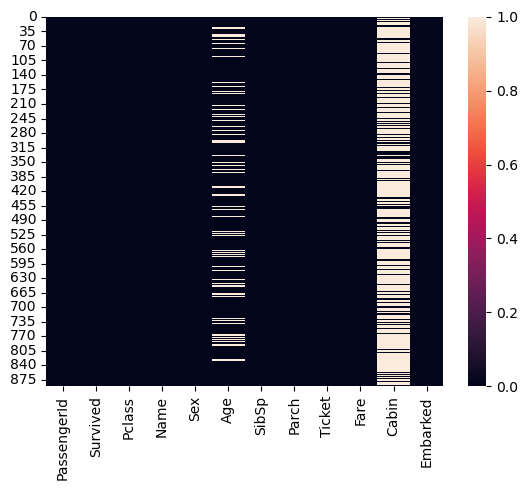

In [9]:
sns.heatmap(ship.isnull())

## 2- Clean Data

In [7]:
# I delete the Cabin and Name because the Cabin has to much nulls and I think the Name dosen't matter

ship.drop(['Cabin','Name'], axis = 1, inplace = True) 
ship.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,382652,29.1250,Q
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


In [11]:
 ## here I want to see is the price of tickets making deffrinces or not

ship['Fare'].nunique()

90

In [10]:
## I approxomaite the prices of tickets to the nearst INT to lowest the number

ship.Fare = ship.Fare.round(0).astype(int)       

In [12]:
## The Age column had nulls I will fill it with median Ages of travelers 

ship.Age = ship.Age.fillna(ship.Age.median())

<Axes: >

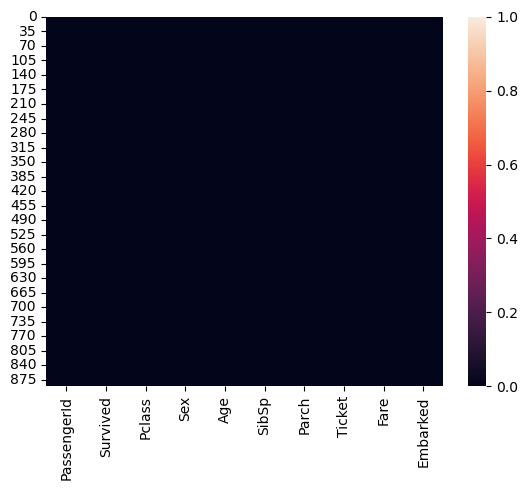

In [13]:
sns.heatmap(ship.isnull())

In [14]:
#A way to make sure there isn't inconssitant data 

for col in ship:
    print(f'The column:{col}\nvalues_count:\n{ship[col].value_counts()}\n\n')

The column:PassengerId
values_count:
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


The column:Survived
values_count:
0    549
1    342
Name: Survived, dtype: int64


The column:Pclass
values_count:
3    491
1    216
2    184
Name: Pclass, dtype: int64


The column:Sex
values_count:
male      577
female    314
Name: Sex, dtype: int64


The column:Age
values_count:
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64


The column:SibSp
values_count:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


The column:Parch
values_count:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


The column:Ticket
values_count:
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
       

In [15]:
# #Change Survived into Y & N 
# ship['Survived'] = ship['Survived'].replace([0,1],['No','Yes'])

#Convert Sex into 00 for Women, 01 for men 
ship['Sex'] = ship['Sex'].replace(['male','female'],[1,0])

# 3- Data Analysis And Calculate Summery Statistics

In [16]:
co = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']
coo = ship[co]

<Axes: >

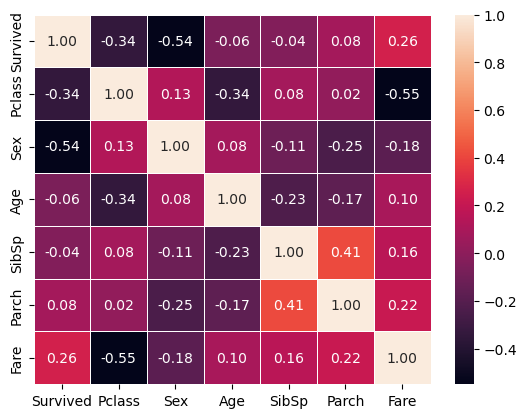

In [17]:
## This a heatmap of the corrliations between all of the column 

sns.heatmap(coo.corr(),annot = True, fmt = '.2f', linewidth = .5)

Text(0.5, 0, 'Survived')

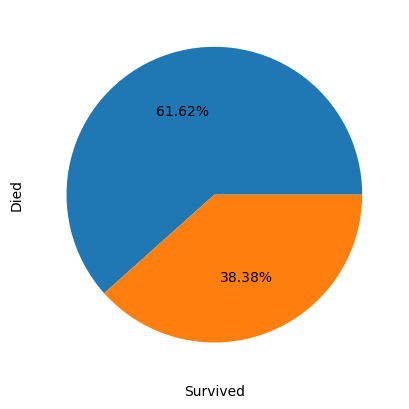

In [18]:
## Here we see the percentage of the people who Survived compared the people who died
## number of died > #Number of survived

plt.pie(ship.Survived.value_counts(),autopct='%0.2f%%')
plt.ylabel("Died")
plt.xlabel("Survived")

Text(0.5, 0, 'Female')

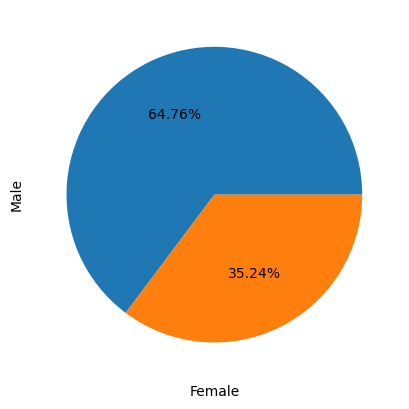

In [19]:
## Here we see the percentage of the Gender of passenger.

plt.pie(ship.Sex.value_counts(),autopct='%0.2f%%')
plt.ylabel("Male")
plt.xlabel("Female")

<Axes: xlabel='Survived', ylabel='count'>

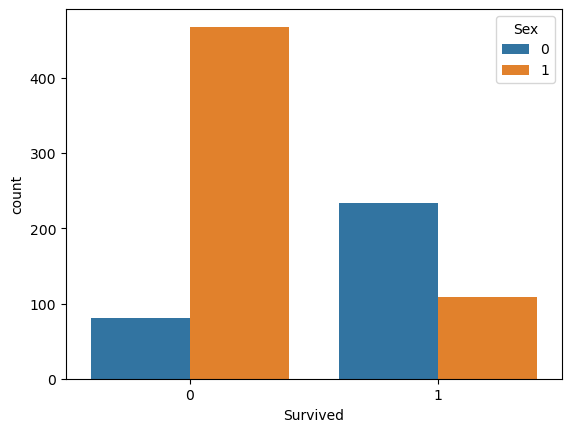

In [20]:
## here the people they survived to who died by gender.

sns.countplot(ship, x= 'Survived', hue = 'Sex')

<Axes: xlabel='Pclass', ylabel='count'>

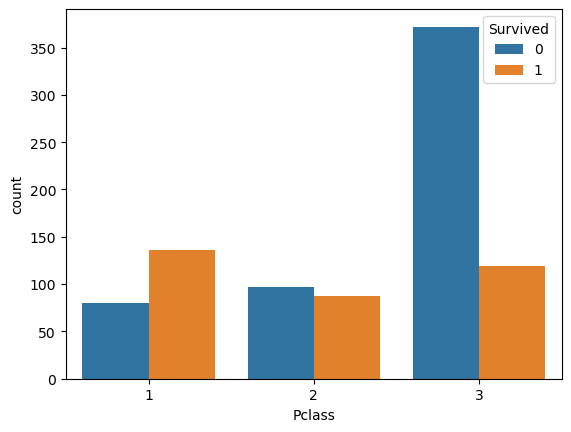

In [21]:
## here the people they survived to who died by Pclass.
## If you were from the 3rd class your chance to die higher than any other class

sns.countplot(x= 'Pclass', hue= 'Survived', data = ship)

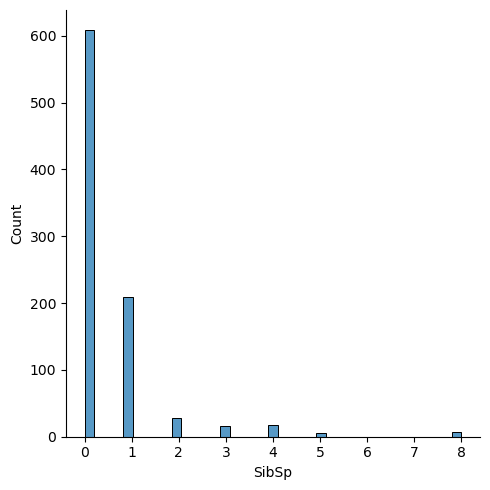

In [22]:
## here the destributions of Siblings of the passengers 

sns.displot(ship.SibSp)

([<matplotlib.patches.Wedge at 0x14523e27590>,
 [Text(-0.7128398214280038, 0.8377704870586524, 'S'),
  Text(0.4614522559226597, -0.9985298270476893, 'Q'),
  Text(1.0595276168013974, -0.29563698894954155, 'C')],
 [Text(-0.38882172077891114, 0.4569657202138104, '72.4%'),
  Text(0.25170123050326887, -0.5446526329351032, '18.9%'),
  Text(0.577924154618944, -0.16125653942702264, '8.7%')])

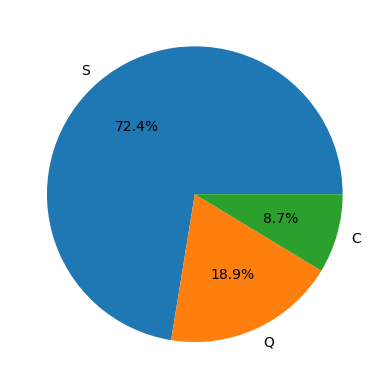

In [35]:
## here number of the people from Port of Embarkation.
labe = ['S','Q','C']
plt.pie(ship.Embarked.value_counts(), labels = labe ,autopct ='%1.1f%%')

<Axes: xlabel='Embarked', ylabel='count'>

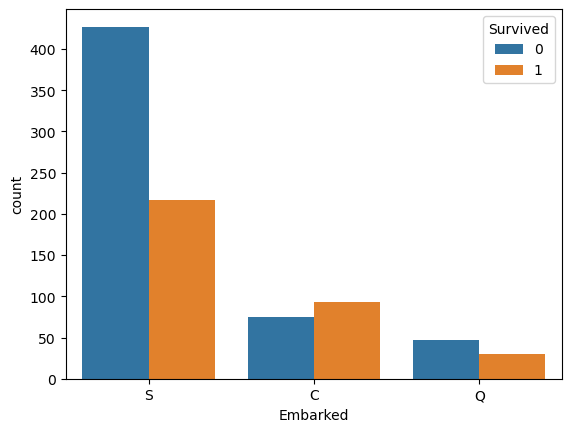

In [24]:
## here the people they survived to who died by the Port of Embarkation .

sns.countplot(x= 'Embarked', hue= 'Survived', data= ship)

<Axes: xlabel='Embarked', ylabel='count'>

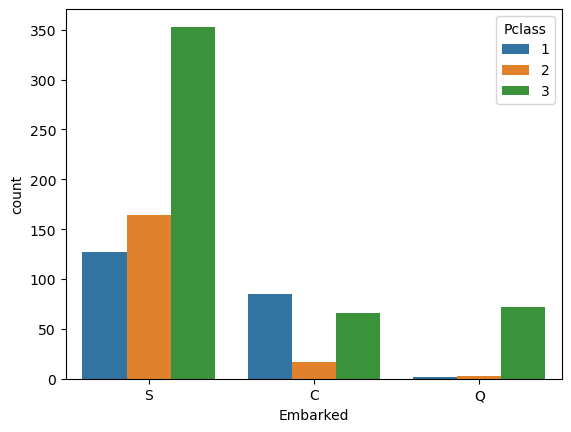

In [25]:
## here number of the people from Port of Embarkation and wich class they are.

sns.countplot(x = 'Embarked',hue = 'Pclass', data = ship)

C:\Users\lapstore\AppData\Local\Temp\ipykernel_8568\2544907649.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ship.Age,bins= 8, norm_hist = True)


<Axes: xlabel='Age', ylabel='Density'>

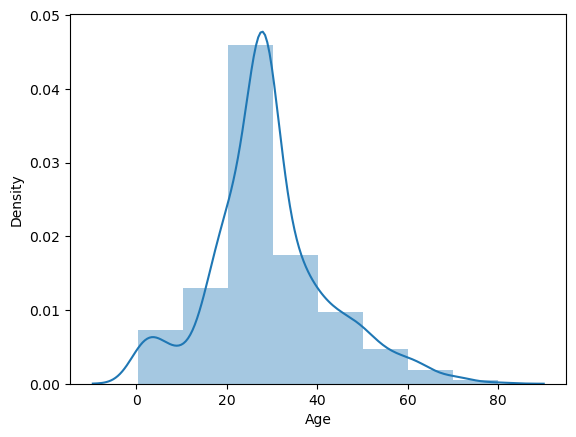

In [47]:
## here distribution of ages for the passengers.

sns.distplot(ship.Age,bins= 8, norm_hist = True)

In [1]:
## Its a pivot table Cell Its may not run if you didn't have the exetention

from pivottablejs import pivot_ui as pp

In [49]:
pp(ship)

# 4- Conclusion 


1- The number of men who traviled on Titanic was approxmatily double of the number of women.

2- The most of people died Was men.

3- The most of people who had died was from the 3rd class.

4- There isn't any coorrleaition between the survived and the family members but in General We can say its a possitive correliation.

5- there most people who had died were from Southampton becuase they was from 3rd Class.

6- There the biggest nummber of women had died were from 3rd class compared to the women in 1rd and 2rd class.